In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

from sklearn import svm, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Create dataframe from .csv
df = pd.read_csv("/content/matchdemon.csv")

# Hiển thị số hàng và số cột trong dataframe
print("Rows: " + str(df.shape[0]) + " Cols: " + str(df.shape[1]))

# hiển thị 10 hàng đầu tiên
display(df.head(10))

Rows: 23309 Cols: 33


id               home                  away  day  month  year  \
0  54418            Everton     Tottenham Hotspur   17      8  2002   
1  54419             Fulham      Bolton Wanderers   17      8  2002   
2  54420       Leeds United       Manchester City   17      8  2002   
3  54421  Manchester United  West Bromwich Albion   17      8  2002   
4  54423        Southampton         Middlesbrough   17      8  2002   
5  54425        Aston Villa             Liverpool   18      8  2002   
6  54424            Arsenal       Birmingham City   18      8  2002   
7  54422   Newcastle United       West Ham United   19      8  2002   
8  54426            Chelsea     Manchester United   23      8  2002   
9  54430    Manchester City      Newcastle United   24      8  2002   

  time (utc) attendance                              venue  \
0      14:00     40,120  Goodison Park, Liverpool, England   
1      14:00     16,338    Craven Cottage, London, England   
2      14:00     40,195        Elland Road, Leeds, England   
3      14:00     67,645  Old Trafford, Manchester, England   
4      14:00     28,341        St. Mary's Stadium, England   
5      13:00     41,183    Villa Park, Birmingham, England   
6      15:05     38,018                  Highbury, England   
7      19:00     51,072            St James' Park, England   
8      19:00     41,541   Stamford Bridge, London, England   
9      11:15     34,776                Maine Road, England   

                              league  ...  away_offsides  home_wonCorners  \
0  2002-2003 Barclays Premier League  ...              0                0   
1  2002-2003 Barclays Premier League  ...              0                0   
2  2002-2003 Barclays Premier League  ...              0                0   
3  2002-2003 Barclays Premier League  ...              0                0   
4  2002-2003 Barclays Premier League  ...              0                0   
5  2002-2003 Barclays Premier League  ...              0                0   
6  2002-2003 Barclays Premier League  ...              0                0   
7  2002-2003 Barclays Premier League  ...              0                0   
8  2002-2003 Barclays Premier League  ...              0                0   
9  2002-2003 Barclays Premier League  ...              0                0   

   away_wonCorners  home_saves  away_saves  home_goal_minutes  \
0                0           0           0            37':81'   
1                0           0           0   11':33': 79':38'   
2                0           0           0     15':45'+1':80'   
3                0           0           0                78'   
4                0           0           0                NaN   
5                0           0           0                NaN   
6                0           0           0             9':24'   
7                0           0           0   61': 72':76':86'   
8                0           0           0          3':45'+1'   
9                0           0           0                36'   

                                   home_goal_scorers  away_goal_minutes  \
0                    Mark Pembridge:Tomasz Radzinski            63':74'   
1  Louis Saha:Sylvain Legwinski:Sylvain Legwinski...                 4'   
2               Nick Barmby:Mark Viduka:Robbie Keane                NaN   
3                               Ole Gunnar Solskjaer                NaN   
4                                                NaN                NaN   
5                                                NaN                47'   
6                      Thierry Henry:Sylvain Wiltord                NaN   
7  Lomana Tresor LuaLua:Lomana Tresor LuaLua:Alan...                NaN   
8                    William Gallas:Boudewijn Zenden            26':66'   
9                                    Darren Huckerby                NaN   

                   away_goal_scorers                  League  
0  Matthew Etherington:Les Ferdinand  English Premier League  
1                   Micha

In [3]:
# Tìm số giá trị duy nhất trong mỗi cột
df.nunique()

id                     23299
home                     199
away                     198
day                       31
month                     12
year                      20
time (utc)                73
attendance             12330
venue                    268
league                    68
home_score                11
away_score                11
home_possessionPct        73
away_possessionPct        73
home_shotsSummary         46
away_shotsSummary         40
home_foulsCommitted       36
away_foulsCommitted       37
home_yellowCards           9
away_yellowCards          10
home_redCards              4
away_redCards              5
home_offsides             15
away_offsides             17
home_wonCorners           21
away_wonCorners           21
home_saves                18
away_saves                19
home_goal_minutes       9551
home_goal_scorers      13021
away_goal_minutes       7144
away_goal_scorers      10389
League                     6
dtype: int64

In [4]:
# Kiểm tra giá trị null trong tập dữ liệu
df.isnull().any()

id                     False
home                   False
away                   False
day                    False
month                  False
year                   False
time (utc)             False
attendance              True
venue                   True
league                 False
home_score             False
away_score             False
home_possessionPct     False
away_possessionPct     False
home_shotsSummary      False
away_shotsSummary      False
home_foulsCommitted    False
away_foulsCommitted    False
home_yellowCards       False
away_yellowCards       False
home_redCards          False
away_redCards          False
home_offsides          False
away_offsides          False
home_wonCorners        False
away_wonCorners        False
home_saves             False
away_saves             False
home_goal_minutes       True
home_goal_scorers       True
away_goal_minutes       True
away_goal_scorers       True
League                 False
dtype: bool

In [5]:
# Hiển thị thông tin dataframe chung
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23309 entries, 0 to 23308
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   23309 non-null  int64 
 1   home                 23309 non-null  object
 2   away                 23309 non-null  object
 3   day                  23309 non-null  int64 
 4   month                23309 non-null  int64 
 5   year                 23309 non-null  int64 
 6   time (utc)           23309 non-null  object
 7   attendance           19095 non-null  object
 8   venue                21791 non-null  object
 9   league               23309 non-null  object
 10  home_score           23309 non-null  int64 
 11  away_score           23309 non-null  int64 
 12  home_possessionPct   23309 non-null  int64 
 13  away_possessionPct   23309 non-null  int64 
 14  home_shotsSummary    23309 non-null  int64 
 15  away_shotsSummary    23309 non-null  int64 
 16  home

In [6]:
# Mô tả phân tích cơ bản của dataframe
display(np.round(df.describe()))

id      day    month     year  home_score  away_score  \
count   23309.0  23309.0  23309.0  23309.0     23309.0     23309.0   
mean   400938.0     16.0      6.0   2014.0         2.0         1.0   
std    148621.0      9.0      4.0      5.0         1.0         1.0   
min     54418.0      1.0      1.0   2002.0         0.0         0.0   
25%    273134.0      8.0      3.0   2009.0         1.0         0.0   
50%    422340.0     17.0      5.0   2015.0         1.0         1.0   
75%    541563.0     23.0     10.0   2019.0         2.0         2.0   
max    614925.0     31.0     12.0   2021.0        10.0        13.0   

       home_possessionPct  away_possessionPct  home_shotsSummary  \
count             23309.0             23309.0            23309.0   
mean                 51.0                48.0               14.0   
std                  12.0                12.0                5.0   
min                   0.0                 0.0                0.0   
25%                  44.0                41.0               10.0   
50%                  51.0                48.0               14.0   
75%                  58.0                56.0               17.0   
max                 100.0               100.0               47.0   

       away_shotsSummary  ...  home_yellowCards  away_yellowCards  \
count            23309.0  ...           23309.0           23309.0   
mean                11.0  ...               2.0               2.0   
std                  5.0  ...               1.0               1.0   
min                  0.0  ...               0.0               0.0   
25%                  8.0  ...               1.0               1.0   
50%                 11.0  ...               2.0               2.0   
75%                 14.0  ...               3.0               3.0   
max                 45.0  ...               8.0               9.0   

       home_redCards  away_redCards  home_offsides  away_offsides  \
count        23309.0        23309.0        23309.0        23309.0   
mean             0.0            0.0            2.0            2.0   
std              0.0            0.0            2.0            2.0   
min              0.0            0.0            0.0            0.0   
25%              0.0            0.0            1.0            1.0   
50%              0.0            0.0            2.0            2.0   
75%              0.0            0.0            3.0            3.0   
max              3.0            4.0           14.0           17.0   

       home_wonCorners  away_wonCorners  home_saves  away_saves  
count          23309.0          23309.0     23309.0     23309.0  
mean               6.0              4.0         3.0         4.0  
std                3.0              3.0         2.0         2.0  
min                0.0              0.0         0.0         0.0  
25%                3.0              3.0         1.0         2.0  
50%                5.0              4.0         3.0         3.0  
75%                8.0              6.0         4.0         5.0  
max               20.0             20.0        18.0        18.0  

[8 rows x 22 columns]

<ipython-input-7-e4964b4645fb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


id       day     month      year  home_score  \
id                   1.000000 -0.003210  0.005915  0.997640    0.001083   
day                 -0.003210  1.000000  0.085490 -0.002546   -0.007228   
month                0.005915  0.085490  1.000000  0.008736    0.001432   
year                 0.997640 -0.002546  0.008736  1.000000    0.002499   
home_score           0.001083 -0.007228  0.001432  0.002499    1.000000   
away_score           0.044787  0.005712  0.016294  0.044968   -0.080109   
home_possessionPct   0.060711  0.001257  0.008818  0.069541    0.132918   
away_possessionPct   0.088432  0.018758 -0.003241  0.096814   -0.124729   
home_shotsSummary   -0.048760 -0.004694  0.022133 -0.045728    0.273581   
away_shotsSummary    0.024009  0.007673  0.016531  0.025771   -0.103101   
home_foulsCommitted -0.108405  0.001388 -0.007295 -0.126371   -0.074144   
away_foulsCommitted -0.136908 -0.003813  0.003654 -0.153501   -0.039866   
home_yellowCards     0.050720 -0.017063 -0.001768  0.046249   -0.116633   
away_yellowCards    -0.017590 -0.012578  0.017767 -0.022123   -0.002811   
home_redCards       -0.011585  0.000307  0.010283 -0.014118   -0.086020   
away_redCards       -0.039918 -0.014081  0.005842 -0.041949    0.083007   
home_offsides       -0.163088 -0.003085  0.001467 -0.169030    0.047316   
away_offsides       -0.173260  0.002576  0.000629 -0.179865   -0.043728   
home_wonCorners     -0.026572 -0.010536  0.008661 -0.030779    0.018240   
away_wonCorners      0.049906  0.009586 -0.001879  0.046557   -0.052375   
home_saves          -0.080418  0.017934  0.016794 -0.087118   -0.070187   
away_saves          -0.145393 -0.000741  0.010159 -0.154169    0.083470   

                     away_score  home_possessionPct  away_possessionPct  \
id                     0.044787            0.060711            0.088432   
day                    0.005712            0.001257            0.018758   
month                  0.016294            0.008818           -0.003241   
year                   0.044968            0.069541            0.096814   
home_score            -0.080109            0.132918           -0.124729   
away_score             1.000000           -0.101013            0.103030   
home_possessionPct    -0.101013            1.000000           -0.550029   
away_possessionPct     0.103030           -0.550029            1.000000   
home_shotsSummary     -0.087536            0.409404           -0.417072   
away_shotsSummary      0.308940           -0.389747            0.397969   
home_foulsCommitted    0.002299           -0.169717            0.076588   
away_foulsCommitted   -0.031111            0.032739           -0.131717   
home_yellowCards       0.073690           -0.093250            0.096693   
away_yellowCards      -0.040593            0.050219           -0.068138   
home_redCards          0.129960           -0.094551            0.094398   
away_redCards         -0.066829            0.076995           -0.083634   
home_offsides         -0.043143           -0.012892           -0.017527   
away_offsides          0.042315           -0.036914           -0.009189   
home_wonCorners       -0.050520            0.326588           -0.346316   
away_wonCorners        0.039195           -0.305759            0.324654   
home_saves             0.086878           -0.205164            0.232073   
away_saves            -0.073129            0.239011           -0.234746   

                     home_shotsSummary  away_shotsSummary  ...  \
id                           -0.048760           0.024009  ...   
day                          -0.004694           0.007673  ...   
month                         0.022133           0.016531  ...   
year                         -0.045728           0.025771  ...   
home_score                    0.273581          -0.103101  ...   
away_score                   -0.087536           0.308940  ...   
home_possessionPct            0.409404          -0.389747  ...   
away_possessionPct           -0.417072         

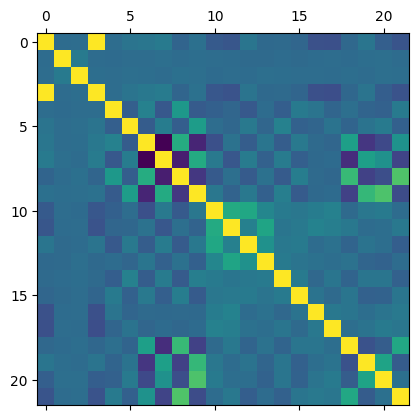

In [7]:
# hiển thị ma trận tương quan biến
# Gợi ý: khám phá plt.matshow và corr() của dataframe
correlation = df.corr()
display(correlation)
plt.matshow(correlation)

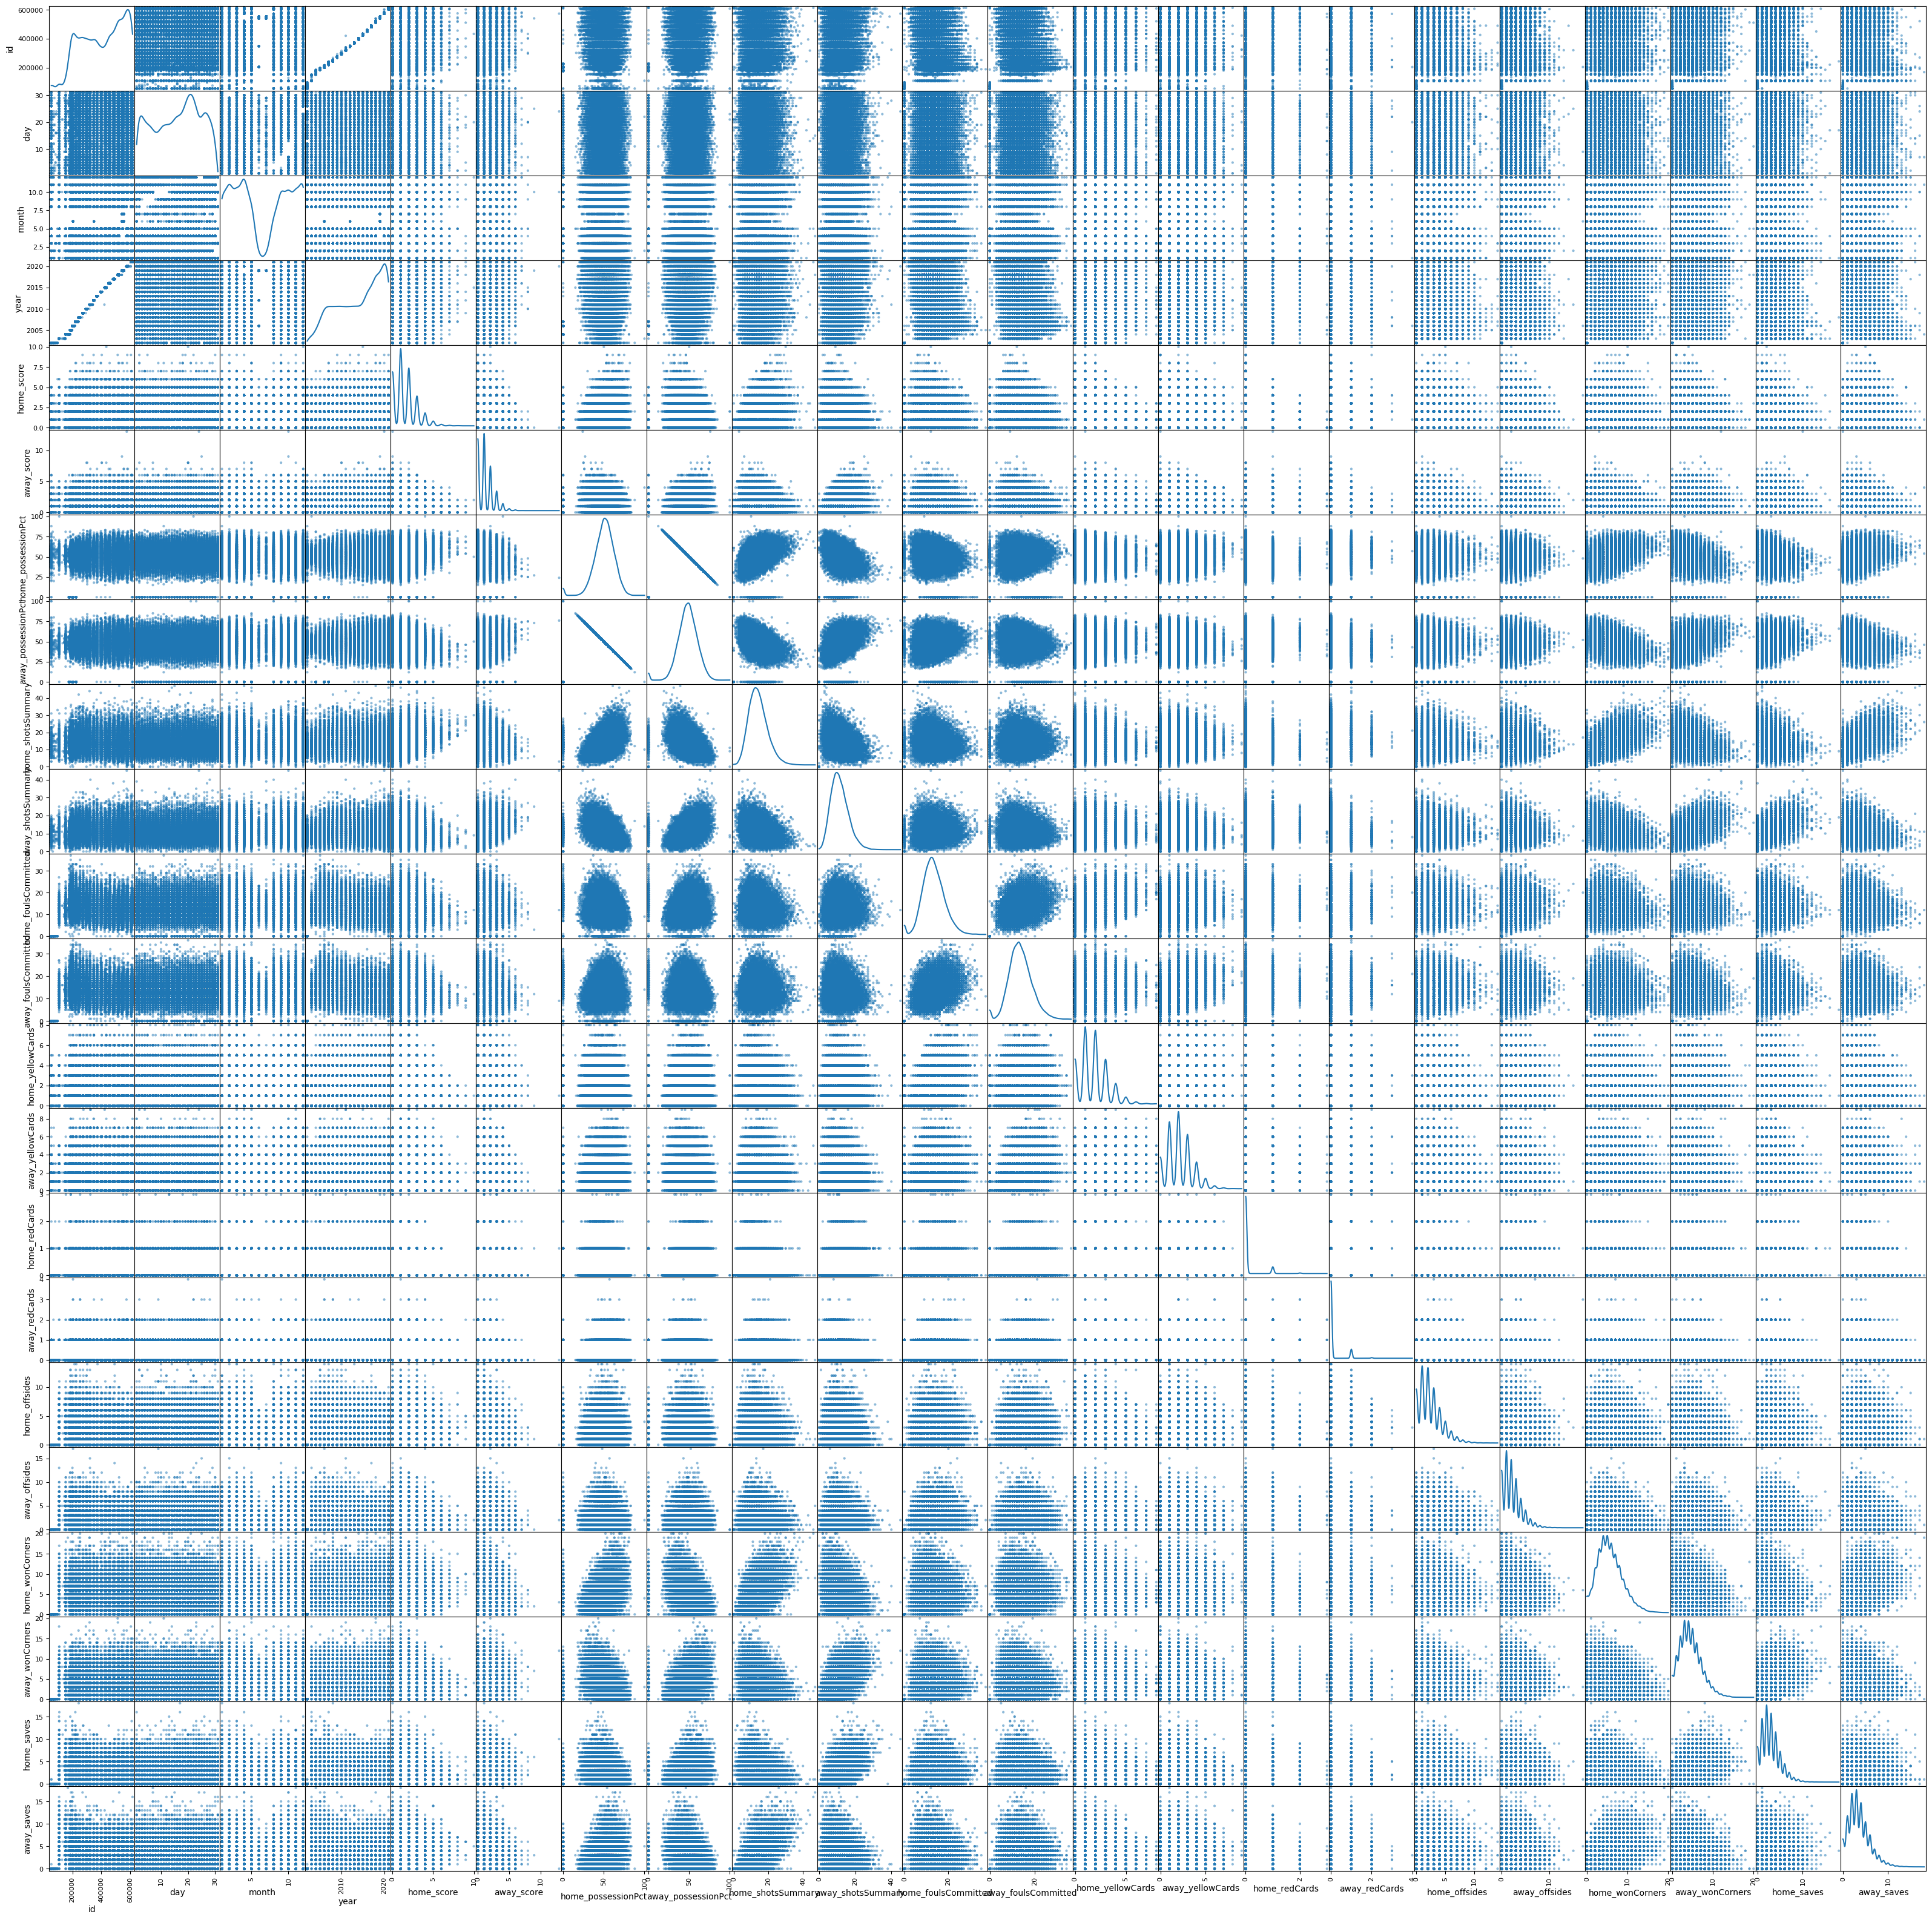

In [8]:
# Hiển thị mối tương quan dưới dạng hàm rời rạc giữa các biến khác nhau bằng ma trận
# Độc lập để nhận ra các mối quan hệ tuyến tính

# Gợi ý: khám phá pd.plotting.scatter_matrix
pd.plotting.scatter_matrix(df, figsize = (40,40), diagonal = 'kde');

In [9]:
df.drop('home', axis=1, inplace=True)
df.drop('away', axis=1, inplace=True)
df.drop('time (utc)', axis=1, inplace=True)
df.drop('attendance', axis=1, inplace=True)
df.drop('venue', axis=1, inplace=True)
df.drop('league', axis=1, inplace=True)
df.drop('home_goal_minutes', axis=1, inplace=True)
df.drop('home_goal_scorers', axis=1, inplace=True)
df.drop('away_goal_minutes', axis=1, inplace=True)
df.drop('away_goal_scorers', axis=1, inplace=True)
df.drop('League', axis=1, inplace=True)

In [10]:
print(df)

           id  day  month  year  home_score  away_score  home_possessionPct  \
0       54418   17      8  2002           2           2                  60   
1       54419   17      8  2002           4           1                  54   
2       54420   17      8  2002           3           0                  51   
3       54421   17      8  2002           1           0                  37   
4       54423   17      8  2002           0           0                  58   
...       ...  ...    ...   ...         ...         ...                 ...   
23304  609172    8      5  2021           4           1                  41   
23305  609176    8      5  2021           2           1                  49   
23306  609173    8      5  2021           1           2                  39   
23307  609175    8      5  2021           0           3                  31   
23308  609180    8      5  2021           2           2                  64   

       away_possessionPct  home_shotsSummary  away_

In [11]:
# # Tạo một dataframe chỉ chứa cột biến phụ thuộc:
# class_raw = df[['home_score', 'away_score']]
# # Tạo một dataframe chứa các biến độc lập:
# features_raw = df.drop(['home_score', 'away_score'], axis = 1)

# # Xác định một Random Forest với các siêu tham số khác nhau (thử nghiệm!):
# clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

# # Huấn luyện một Random Forest trên toàn bộ tập dữ liệu:
# clf.fit(features_raw, class_raw)

# ######

# feature_list = list(zip(df.columns.values, clf.feature_importances_))
# sorted_by_importance = sorted(feature_list, key=lambda x: x[1], reverse=True)

# for feat, value in sorted_by_importance:
#     print(feat, value)

In [12]:
# # Chia tập kiểm tra thành tỷ lệ nhất định (thử nghiệm!)
# X_train, X_test, y_train, y_test = train_test_split(features_raw, 
#                                                     class_raw, 
#                                                     test_size = 0.25, 
#                                                     random_state = 42)
# ######

# print("El dataset de training tiene {} elementos.".format(X_train.shape[0]))
# print("El dataset de testing tiene {} elementos.".format(X_test.shape[0]))

In [13]:
# # Xác định một bộ phân loại, hãy nhớ rằng đây là một bài toán phân loại ba lớp
# classifier = svm.SVC()

# # Xác định một bộ phân loại, hãy nhớ rằng đây là một bài toán phân loại ba lớp
# classifier.fit(X_train, y_train)

# # Dự đoán giá trị cho các biến độc lập trong tập kiểm tra
# predicted = classifier.predict(X_test)

# # Tính toán độ chính xác
# # Gợi ý: khám phá sklearn.metrics.accuracy_score
# print("Độ chính xác: " + str(metrics.accuracy_score(y_test, predicted)))
# print("Report:\n" + metrics.classification_report(y_test, predicted))

In [14]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Tạo dataframe chỉ chứa cột biến độc lập 'home_score' và 'away_score':
features = df[['home_score', 'away_score']]

# Tạo biến đầu ra 'result' dựa trên điều kiện thắng/thua:
df['result'] = df.apply(lambda row: 'win' if row['home_score'] > row['away_score'] else 'loss', axis=1)
target = df['result']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Xác định một SVM với các siêu tham số khác nhau (thử nghiệm!):
clf = SVC(kernel='linear', C=1.0, random_state=42)

# Huấn luyện SVM trên tập huấn luyện:
clf.fit(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra:
y_pred = clf.predict(X_test)

# Đánh giá mô hình:
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)



Accuracy: 1.0


In [19]:
from sklearn.svm import SVC

# Nhập home_score và away_score từ người dùng
home_score = float(input("Nhập số bàn thắng của đội nhà (home_score): "))
away_score = float(input("Nhập số bàn thắng của đội khách (away_score): "))

# Chuẩn bị dữ liệu cho dự đoán
features = [[home_score, away_score]]

# Tạo mô hình SVM
clf = SVC(kernel='linear', C=1.0, random_state=42)

# Huấn luyện mô hình với toàn bộ dữ liệu
clf.fit(X_train, y_train)

# Dự đoán kết quả
result = clf.predict(features)[0]

# In kết quả dự đoán
if result == 'win':
    print("Đội nhà thắng!")
elif result == 'loss':
    print("Đội khách thắng!")
else:
    print("Trận đấu hòa!")



Nhập số bàn thắng của đội nhà (home_score): 1
Nhập số bàn thắng của đội khách (away_score): 1
Đội khách thắng!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


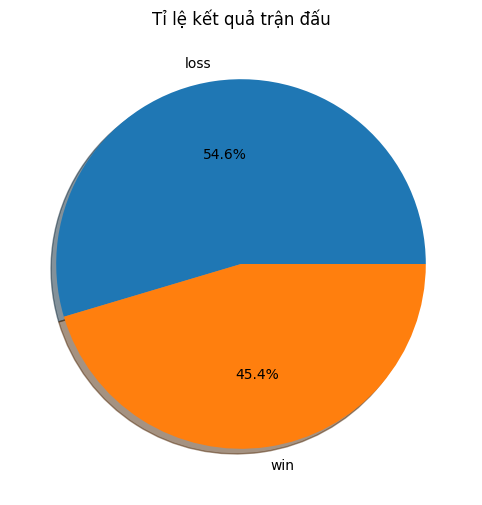

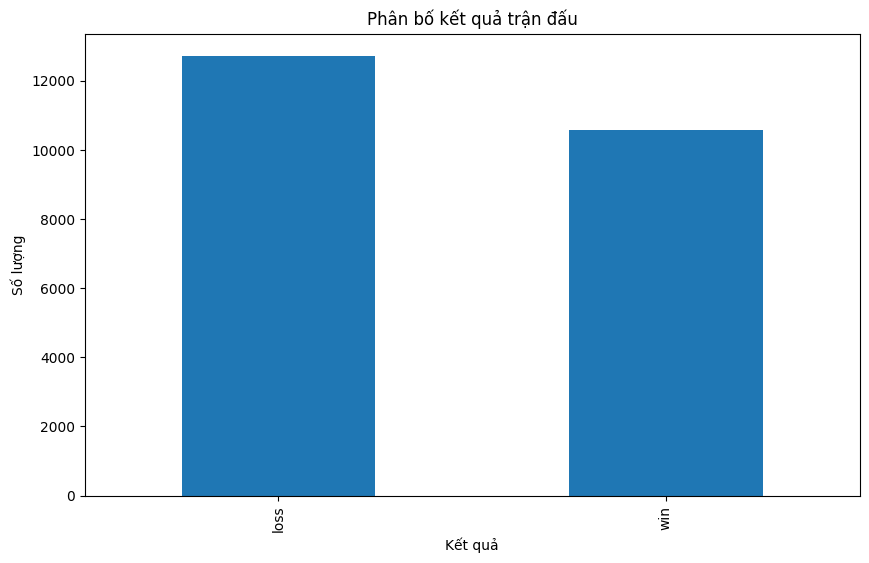

In [20]:
import matplotlib.pyplot as plt

# Tạo biểu đồ pie
plt.figure(figsize=(10, 6))
df['result'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Tỉ lệ kết quả trận đấu')
plt.ylabel('')

# Tạo biểu đồ bar
plt.figure(figsize=(10, 6))
df['result'].value_counts().plot.bar()
plt.title('Phân bố kết quả trận đấu')
plt.xlabel('Kết quả')
plt.ylabel('Số lượng')

plt.show()


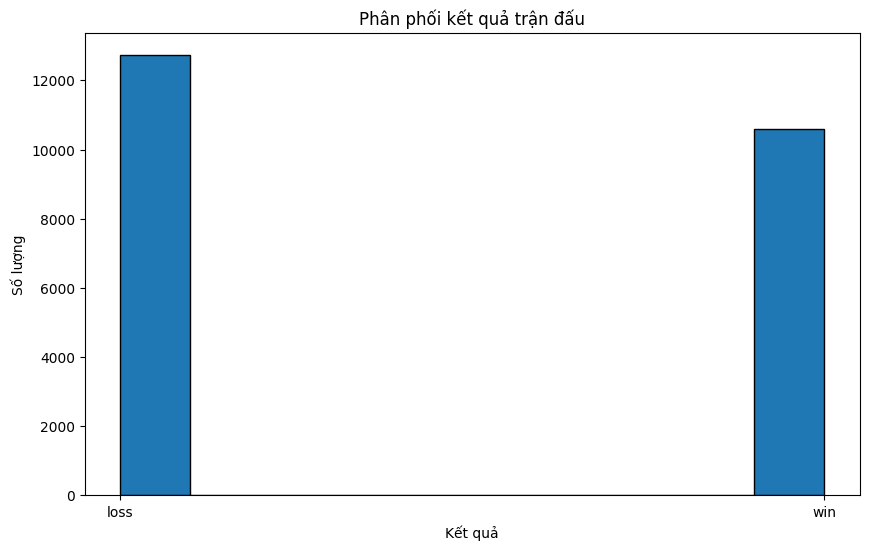

In [22]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
plt.hist(df['result'], bins=10, edgecolor='black')  # Số lượng bin là 10
plt.title('Phân phối kết quả trận đấu')
plt.xlabel('Kết quả')
plt.ylabel('Số lượng')

plt.show()


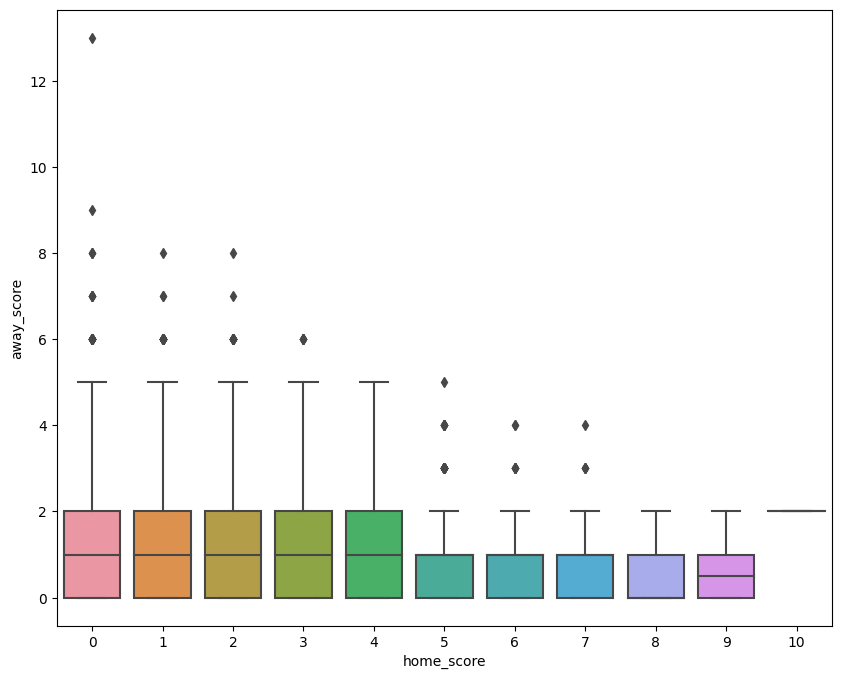

In [24]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="home_score", y="away_score", data=df)
plt.show()

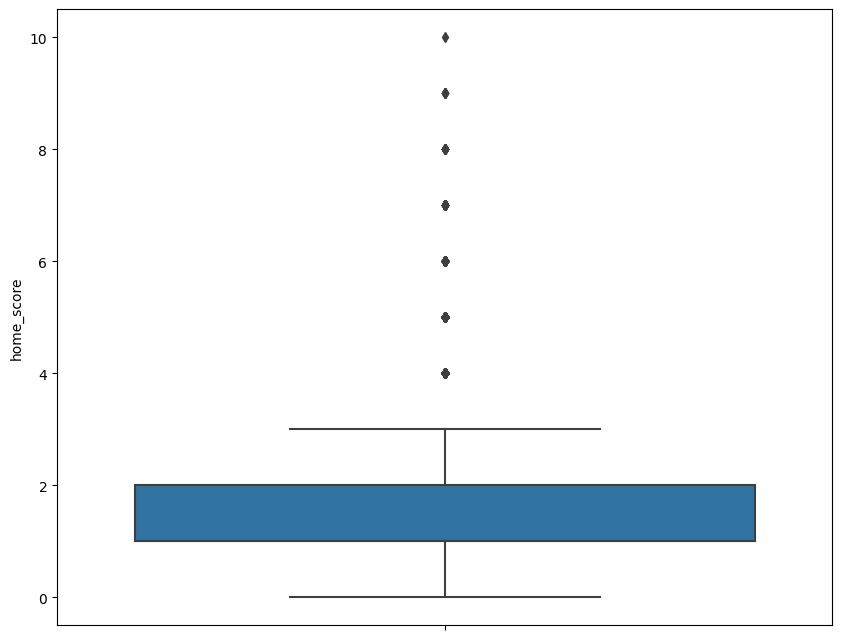

In [27]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(y="home_score", data=df)
plt.show()

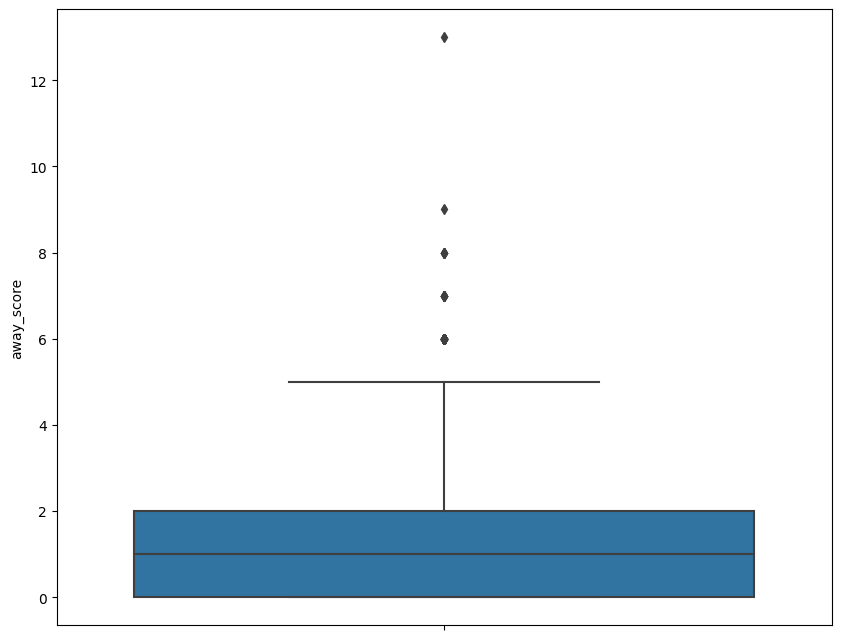

In [28]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(y="away_score", data=df)
plt.show()